In [8]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",999)
import numpy as np
import json


# Getting some info from JSON file

In [4]:
df = pd.read_pickle("../data/cuentalo_json_con_pais_ciudad_limpios.pkl")

## Timeline of the hashtag -- how did it spread?

In [9]:
df.columns

Index(['country', 'created_at', 'favorite_count', 'full_text', 'id', 'lat',
       'location', 'lon', 'parent_country', 'parent_created_at',
       'parent_favorite_count', 'parent_full_text', 'parent_id', 'parent_lat',
       'parent_location', 'parent_lon', 'parent_place', 'parent_quote_count',
       'parent_retweet_count', 'parent_time_zone', 'parent_user_created_at',
       'parent_user_followers_count', 'parent_user_id', 'parent_user_name',
       'parent_user_screen_name', 'parent_user_statuses_count', 'place',
       'quote_count', 'retweet_count', 'time_zone', 'tweet_type',
       'user_created_at', 'user_followers_count', 'user_id', 'user_name',
       'user_screen_name', 'user_statuses_count', 'ciudad_clean', 'pais_clean',
       'location_diagnosis', 'parent_ciudad_clean', 'parent_pais_clean',
       'parent_location_diagnosis'],
      dtype='object')

RTs by influencers...? Who spread the #cuéntalo?

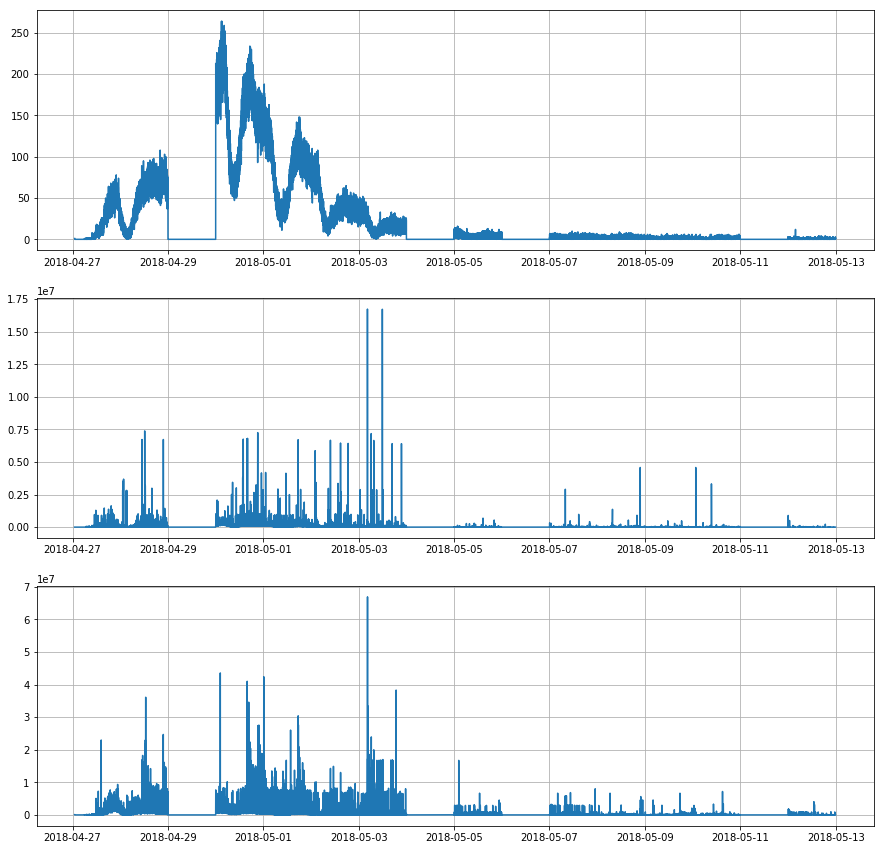

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
ax[0].plot(df[['created_at','retweet_count']].set_index('created_at').resample('15S').count())
ax[0].grid(True)

ax[1].plot(df[['created_at','user_followers_count']].set_index('created_at').resample('15S').sum())
ax[1].grid(True)

ax[2].plot(df[['created_at','parent_user_followers_count']].set_index('created_at').resample('15S').sum())
ax[2].grid(True)
plt.show()

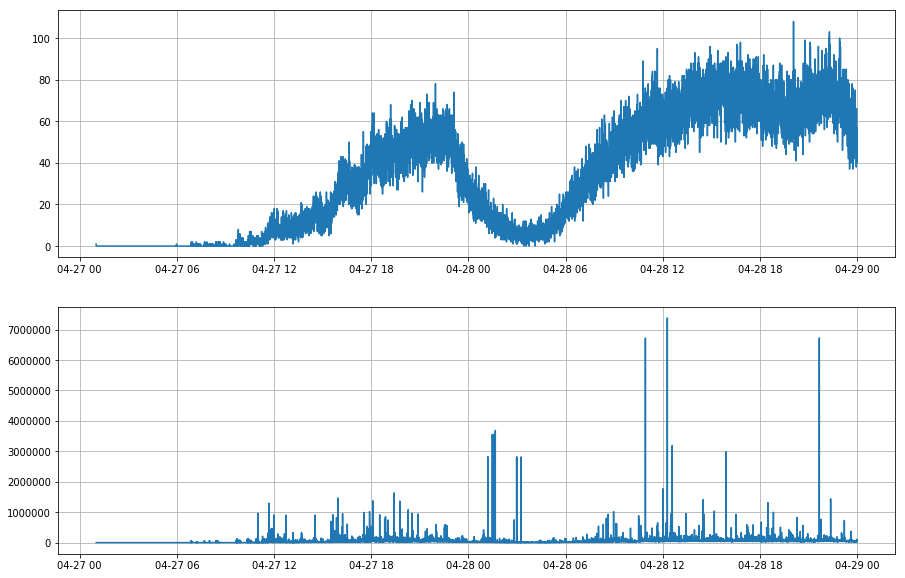

In [16]:
import datetime

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
ax[0].plot(df[['created_at','retweet_count']][df['created_at']< datetime.datetime(2018,4,29)].set_index('created_at').resample('15S').count())
ax[0].grid(True)
ax[1].plot(df[['created_at','user_followers_count']][df['created_at']< datetime.datetime(2018,4,29)].set_index('created_at').resample('15S').sum())
ax[1].grid(True)
plt.show()


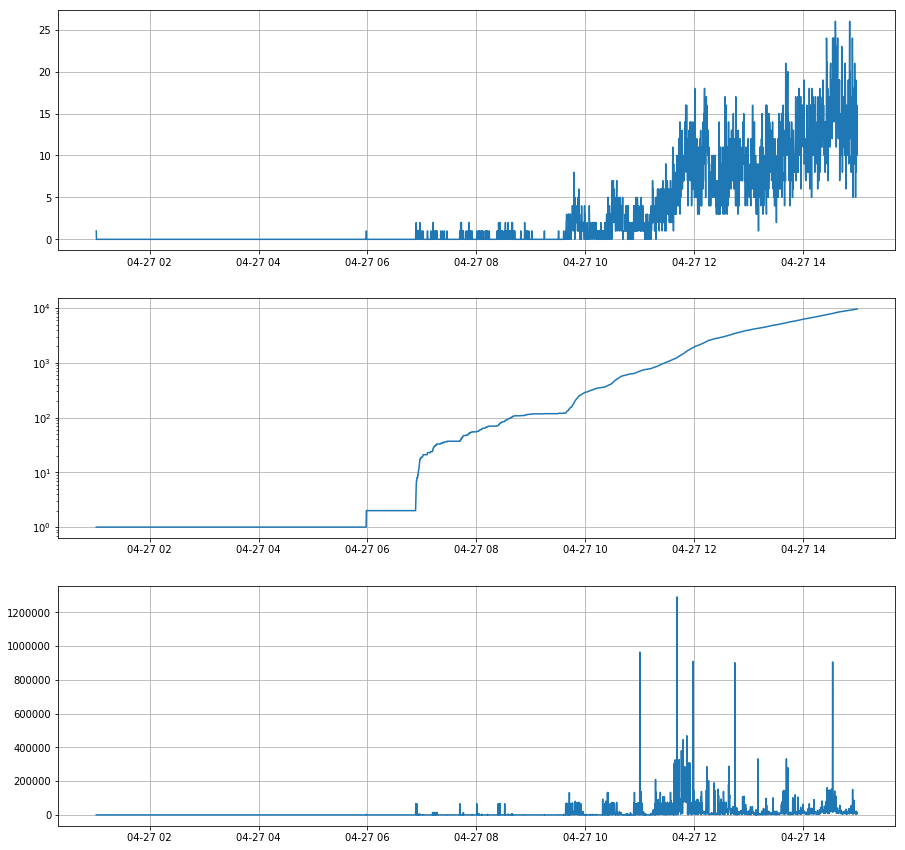

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

ax[0].plot(df[['created_at','retweet_count']][df['created_at']< datetime.datetime(2018,4,27,15,0,0)].set_index('created_at').resample('15S').count())
ax[0].grid(True)

ax[1].plot(df[['created_at','retweet_count']][df['created_at']< datetime.datetime(2018,4,27,15,0,0)].set_index('created_at').resample('15S').count().cumsum())
ax[1].set_yscale("log")
ax[1].grid(True)

ax[2].plot(df[['created_at','user_followers_count']][df['created_at']< datetime.datetime(2018,4,27,15,0,0)].set_index('created_at').resample('15S').sum())
ax[2].grid(True)
plt.show()


Tweets that made this movement viral?

First wave, 7 AM

In [20]:
df[(df['created_at']< datetime.datetime(2018,4,27,7,0,0)) & (df['user_followers_count']>10000)][['created_at','user_screen_name','user_followers_count']].sort_values('user_followers_count')

,created_at,user_screen_name,user_followers_count
tweet_id,,,
989759705344950273,2018-04-27 06:54:37,LaFallaras,66090
989759402767859712,2018-04-27 06:53:25,LaFallaras,66090


Second wave, 10 AM

In [22]:
df[(df['created_at']>= datetime.datetime(2018,4,27,7,0,0)) & (df['created_at']< datetime.datetime(2018,4,27,10,0,0)) & (df['user_followers_count']>10000)][['created_at','user_screen_name','user_followers_count']].sort_values('user_followers_count')[:20]

,created_at,user_screen_name,user_followers_count
tweet_id,,,
989764018779840518,2018-04-27 07:11:45,manubenas,14548
989764518556319744,2018-04-27 07:13:44,manubenas,14548
989764817631174656,2018-04-27 07:14:56,manubenas,14548
989765213242052608,2018-04-27 07:16:30,manubenas,14548
989772601244319744,2018-04-27 07:45:51,manubenas,14548
989764409403756544,2018-04-27 07:13:18,manubenas,14548
989805732995485696,2018-04-27 09:57:31,kolontai1959,20577
989802741345275904,2018-04-27 09:45:37,LaFallaras,66090
989805188335759360,2018-04-27 09:55:21,LaFallaras,66090


Third wave 11:30 AM

In [23]:
df[(df['created_at']< datetime.datetime(2018,4,27,11,30,0)) & (df['user_followers_count']>100000)][['created_at','user_screen_name','user_followers_count']].sort_values('user_followers_count')

,created_at,user_screen_name,user_followers_count
tweet_id,,,
989821531864911873,2018-04-27 11:00:17,publico_es,898092


Fourth wave 12:30 AM

In [25]:
df[(df['created_at']>= datetime.datetime(2018,4,27,11,30,0)) & (df['created_at']< datetime.datetime(2018,4,27,12,30,0)) & (df['user_followers_count']>100000)][['created_at','user_screen_name','user_followers_count']].sort_values('user_followers_count')

,created_at,user_screen_name,user_followers_count
tweet_id,,,
989843365188562944,2018-04-27 12:27:03,kurioso,105327
989842344055799810,2018-04-27 12:22:59,JosePerLo,141405
989843250096750592,2018-04-27 12:26:35,Solidaridad1000,146345
989842118314164224,2018-04-27 12:22:06,lamarea_com,181573
989835426318946305,2018-04-27 11:55:30,Barbijaputa,300831
989835175969239041,2018-04-27 11:54:30,Barbijaputa,300831
989834674972299264,2018-04-27 11:52:31,Barbijaputa,300831
989834562900496386,2018-04-27 11:52:04,Barbijaputa,300831
989833577050275840,2018-04-27 11:48:09,Barbijaputa,300831


Fifth wave 3 PM

In [26]:
df[ (df['created_at']>= datetime.datetime(2018,4,27,12,30,0)) & (df['created_at']< datetime.datetime(2018,4,27,15,0,0)) & (df['user_followers_count']>100000)][['created_at','user_screen_name','user_followers_count']].sort_values('user_followers_count')

,created_at,user_screen_name,user_followers_count
tweet_id,,,
989875019722510336,2018-04-27 14:32:50,MotivacionAhora,148066
989875016023138305,2018-04-27 14:32:49,MotivacionAhora,148066
989875011447083009,2018-04-27 14:32:48,MotivacionAhora,148066
989875008209145864,2018-04-27 14:32:47,MotivacionAhora,148066
989875004421607424,2018-04-27 14:32:46,MotivacionAhora,148066
989875000982364160,2018-04-27 14:32:45,MotivacionAhora,148066
989862223022579713,2018-04-27 13:41:59,lamarea_com,181573
989854302708494336,2018-04-27 13:10:31,epigmenioibarra,325243
989847882676174849,2018-04-27 12:45:00,publico_es,898092


Sixth wave, 27th afternoon

In [29]:
inid = datetime.datetime(2018,4,27,15,0,0)
endd = datetime.datetime(2018,4,28,0,0,0)
umbral = 300000
df[(df['created_at']>= inid) & (df['created_at']< endd) & (df['user_followers_count']>umbral)][['created_at','user_screen_name','user_followers_count']].sort_values('user_followers_count')[:20]

,created_at,user_screen_name,user_followers_count
tweet_id,,,
989988177145417733,2018-04-27 22:02:29,comentaconjose,322958
989893157662875648,2018-04-27 15:44:54,MIAREsproject,378904
989979396562878464,2018-04-27 21:27:35,luisbremer,382713
989955994687016960,2018-04-27 19:54:36,pnique,421053
989923484443774977,2018-04-27 17:45:25,lavecinarubia,425957
989924039899705344,2018-04-27 17:47:37,lavecinarubia,425957
989927513462857728,2018-04-27 18:01:25,lavecinarubia,425957
989987832642134016,2018-04-27 22:01:07,MonicaCarrillo,472315
989899792359837696,2018-04-27 16:11:16,MonederoJC,482270


Seventh wave, day 28th of April

In [30]:
inid = datetime.datetime(2018,4,28,0,0,0)
endd = datetime.datetime(2018,4,29,0,0,0)
umbral = 500000
df[(df['created_at']>= inid) & (df['created_at']< endd) & (df['user_followers_count']>umbral)][['created_at','user_screen_name','user_followers_count']].sort_values('user_followers_count')[:20]

,created_at,user_screen_name,user_followers_count
tweet_id,,,
990329556211982336,2018-04-28 20:39:00,324cat,507442
990193612364410880,2018-04-28 11:38:48,324cat,507465
990139051859759104,2018-04-28 08:02:00,324cat,507481
990277314134110209,2018-04-28 17:11:24,Siliconvalle,531529
990283281039003650,2018-04-28 17:35:07,srtabebi,531826
990178471547633665,2018-04-28 10:38:38,srtabebi,531903
990155410123513856,2018-04-28 09:07:00,srtabebi,531915
990155968897015808,2018-04-28 09:09:13,srtabebi,531915
990202019234316288,2018-04-28 12:12:13,iniciarsesion,579795


Start geolocalizing tweets

In [32]:
inid = datetime.datetime(2018,4,27,0,0,0)
endd = datetime.datetime(2018,4,29,0,0,0)

df[['created_at','pais_clean']][(df['created_at']>= inid) & (df['created_at']< endd)].set_index('created_at').resample('15min').apply(lambda x: x.unique())[:20]



,pais_clean
created_at,
2018-04-27 01:00:00,NaN
2018-04-27 01:15:00,[]
2018-04-27 01:30:00,[]
2018-04-27 01:45:00,[]
2018-04-27 02:00:00,[]
2018-04-27 02:15:00,[]
2018-04-27 02:30:00,[]
2018-04-27 02:45:00,[]
2018-04-27 03:00:00,[]


In [37]:
df['accumulated_followers'] = df.sort_values(by='created_at').replace(to_replace=-1, value=0).fillna(0).user_followers_count.cumsum()

<Figure size 1080x360 with 0 Axes>

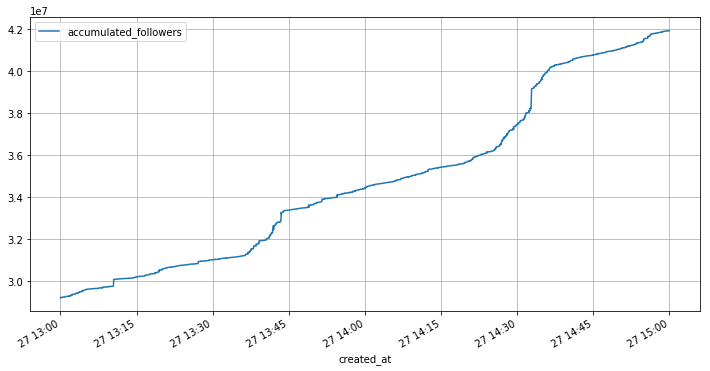

In [38]:
inid = datetime.datetime(2018,4,27,13,0,0)
endd = datetime.datetime(2018,4,27,15,0,0)
plt.figure(figsize=(15, 5))
df[['created_at','accumulated_followers']][(df['created_at']>= inid) 
 & (df['created_at']< endd)].set_index('created_at').plot(figsize=(12,6))
plt.grid(True)
plt.show()

## Other ideas
- geolocalize tweets without location info
- idenify more influential tweets and mostly retweeted (show them with the already identified on the timeline)
- Find a model that measures the impact of a tweet?
 - https://scholarspace.manoa.hawaii.edu/bitstream/10125/50160/1/paper0273.pdf
- Download the original missing tweets
- Find the typical profile of users that tweet original tweets
- Check tweet treatment here: http://www.nltk.org/howto/twitter.html


# Getting info from text properties

- https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/
- https://dzone.com/articles/applying-nlp-to-tweets-with-python
- https://relopezbriega.github.io/blog/2017/09/23/procesamiento-del-lenguaje-natural-con-python/
- https://pmoracho.github.io/blog/2017/01/04/NLTK-mi-tutorial/
- http://www.clubdetecnologia.net/blog/2017/aplicacion-de-nlp-a-tweets-con-python/